In [1]:
#### IMPORTS ####

# data visualisation and manipulation
import numpy as np
import pandas as pd

import random
import pickle 
##graphique
from bokeh.plotting import figure, show, output_file
from bokeh.models.tools import HoverTool
from bokeh.layouts import layout, column
from bokeh.models import ColumnDataSource, Div
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.io import curdoc
import ipywidgets as widgets

# fichiers
import json

In [2]:
#### Chargement des fichiers ####

# Fichier json d'apprentissage
with open('train.json', 'r') as f1:
    datas1 = json.load(f1) # id, cuisine, ingredients[]

# Fichier json dont on cherche les types de cuisines
with open('test.json', 'r') as f2:
    datas2 = json.load(f2) # id, ingredients[]


In [3]:
#### Extraction des données des fichiers ####

csv = []

for data in datas1:
    for ingredient in data['ingredients']:
        # Ajout de la ligne id-cuisine-ingredient
        tmp = dict()
        tmp['id'] = str(data['id'])
        tmp['cuisine'] = data['cuisine']
        tmp['ingredient'] = ingredient
        csv.append(tmp)

df = pd.DataFrame(csv) # DataFrame des données Source (d'apprentissage : train.json)
#dft = pd.DataFrame(csv2) # DataFrame des données de Test (test.json)

In [5]:
#### Récupération des données extraites ####
id_plats_train = sorted(list(df['id'].unique()))
cuisines = list(df['cuisine'].unique())

In [6]:
id_ingr = df[['id', 'ingredient']]

In [7]:
len(cuisines)

20

In [8]:
len(id_plats_train)

39774

In [29]:
#####
#genere des couleur aléatoire
number_of_colors = 20

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
#####

In [30]:
file = open('points_par_pays.data', 'rb')
points_par_pays = pickle.load(file)
file.close()
file2 = open('id_par_points_par_pays.data', 'rb')
id_recette = pickle.load(file2)
file2.close()

In [31]:
len(id_recette)

20

In [32]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import bokeh as bkh

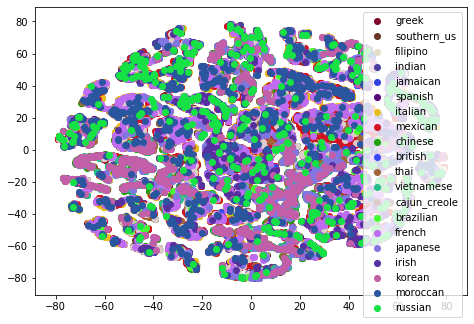

In [33]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 50

#plt.scatter(W[:, 0], W[:, 1], color='turquoise', s=s, lw=0, label='plats')
for i in range(len(points_par_pays)):
    mes_points = np.asarray(points_par_pays[i])
    colors = color[i]
    #for j in range(len(mes_points)):
    #mon_point = points_par_pays[i][j]
    plt.scatter(mes_points[:, 0], mes_points[:, 1], color = colors, s=s, lw=0, label= cuisines[i] )
    
plt.legend(scatterpoints=1, loc='best', shadow=False)
 

In [43]:
table = []

for i in range (len(points_par_pays)):
    mes_points = np.asarray(points_par_pays[i])
    for j in range(len(mes_points)):
        tmp['color'] = color[i];
        tmp['cuisine']= cuisines[i]
        tmp = dict()
        tmp['x'] = mes_points[j][0]
        tmp['y'] = mes_points[j][1]
        tmp['id'] = id_recette[i][j]
        tmp['ingredient']=""
        table.append(tmp)
    
df_c = pd.DataFrame(table)

KeyboardInterrupt: 

In [35]:
df_c.fillna(0)

,x,y,id,color,cuisine
0,-18.655857,-30.058119,10259,#7E092A,greek
1,-21.365353,65.323540,34471,#7E092A,greek
2,-46.844036,32.106205,4635,#7E092A,greek
3,-8.181086,-24.418348,5980,#7E092A,greek
4,-43.514053,54.677376,18031,#7E092A,greek
...,...,...,...,...,...
39769,64.694504,-22.222551,4486,#16E145,russian
39770,-0.104155,70.606598,3878,#16E145,russian
39771,52.613960,-19.595463,31866,#16E145,russian
39772,2.278842,74.519722,18039,#16E145,russian


In [36]:
df_c.columns.tolist()

['x', 'y', 'id', 'color', 'cuisine']

In [37]:
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
p = figure(tools=TOOLS,  tooltips = [ ('id', '@id'),('cuisine', '@cuisine')])


p.title.text = 'Carte des plats par couleur de pays'

In [38]:
source = ColumnDataSource(df_c)

In [39]:
p.circle( 'x' , 'y', source= source, fill_color= 'color' , fill_alpha= 1, line_color=None, size=10 )

GlyphRenderer(id='1056', ...)

In [40]:
show(p)

In [19]:
valeur = widgets.IntText(
    value=0,
    description='id:',
    disabled=False
)
display(valeur) #valeur.value

IntText(value=0, description='id:')

In [41]:
df.loc[df['id'] == '1000']['ingredient']


211525    chopped tomatoes
211526          sour cream
211527    boiling potatoes
211528                salt
211529      corn tortillas
211530       vegetable oil
211531        white cheese
211532             cabbage
211533             avocado
211534      Mexican cheese
211535    chopped cilantro
Name: ingredient, dtype: object

In [71]:
test2 =""
for ingr in df.loc[df['id'] == '100']['ingredient']:
    test2+= ingr +", "

In [72]:
test2

'lime juice, salt, avocado, shallots, tomatoes, garlic, chili, chopped cilantro fresh, '